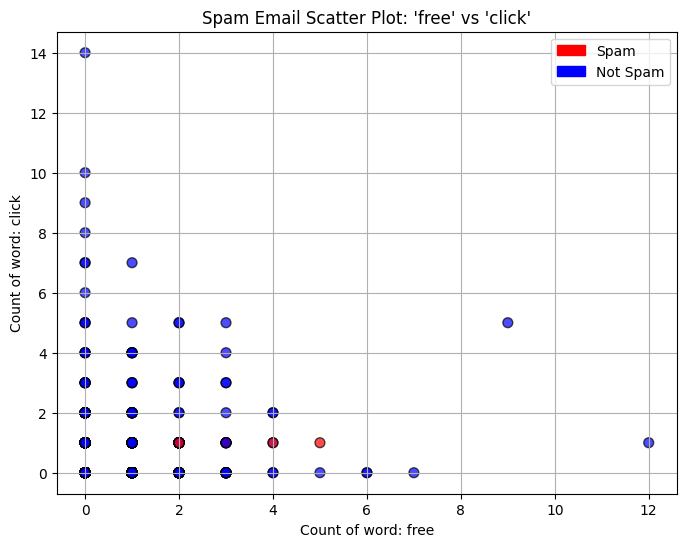

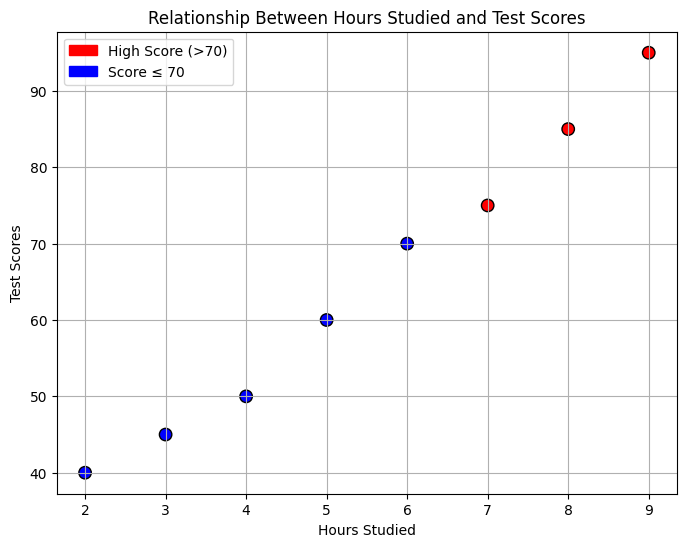

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ----------------------------------------------------------
# 1. LOAD & CLEAN DATA
# ----------------------------------------------------------
df = pd.read_csv("emails.csv")   # <-- Replace with your exact file name

# Drop Email ID column (first column)
df = df.drop(df.columns[0], axis=1)

# ----------------------------------------------------------
# 2. AUTO-DETECT LABEL COLUMN
# ----------------------------------------------------------
possible_label_cols = ["label", "Label", "spam", "is_spam", "class", "Category"]

label_col = None
for col in df.columns:
    if col in possible_label_cols:
        label_col = col
        break

if label_col is None:
    print(df.columns)
    raise ValueError("ERROR: No label column found. Check column names!")

# ----------------------------------------------------------
# 3. AUTO-DETECT WORD COLUMNS: "free" and "click"
# ----------------------------------------------------------
free_cols = [c for c in df.columns if "free" in c.lower()]
click_cols = [c for c in df.columns if "click" in c.lower()]

if not free_cols or not click_cols:
    print(df.columns)
    raise ValueError("ERROR: Columns containing 'free' or 'click' not found!")

word_free = free_cols[0]
word_click = click_cols[0]

# Extract data
x = df[word_free]
y = df[word_click]
labels = df[label_col]

# Color mapping (red = spam, blue = not spam)
colors = ["red" if l == 1 else "blue" for l in labels]

# ----------------------------------------------------------
# 4. SPAM SCATTER PLOT ("free" vs "click")
# ----------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(x, y, c=colors, edgecolor='k', s=50, alpha=0.7)

plt.title("Spam Email Scatter Plot: 'free' vs 'click'")
plt.xlabel(f"Count of word: {word_free}")
plt.ylabel(f"Count of word: {word_click}")

# Custom legend
plt.legend(handles=[
    mpatches.Patch(color='red', label='Spam'),
    mpatches.Patch(color='blue', label='Not Spam')
])

plt.grid(True)
plt.show()

# ----------------------------------------------------------
# 5. HOURS STUDIED VS TEST SCORES PLOT
# ----------------------------------------------------------
hours_studied = [2, 3, 4, 5, 6, 7, 8, 9]
test_scores = [40, 45, 50, 60, 70, 75, 85, 95]

# Red = high score > 70, Blue = others
colors2 = ["red" if score > 70 else "blue" for score in test_scores]

plt.figure(figsize=(8,6))
plt.scatter(hours_studied, test_scores, c=colors2, marker='o',
            s=80, edgecolor='black')

plt.title("Relationship Between Hours Studied and Test Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Test Scores")

plt.legend(handles=[
    mpatches.Patch(color='red', label='High Score (>70)'),
    mpatches.Patch(color='blue', label='Score ≤ 70')
])

plt.grid(True)
plt.show()
